In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas_profiling

%matplotlib inline

In [134]:
data = pd.read_csv('ENB2012_data.csv',delimiter=',')


In [135]:
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28
5,0.90,563.50,318.50,122.50,7.00,3,0.00,0,21.46,25.38
6,0.90,563.50,318.50,122.50,7.00,4,0.00,0,20.71,25.16
7,0.90,563.50,318.50,122.50,7.00,5,0.00,0,19.68,29.60
8,0.86,588.00,294.00,147.00,7.00,2,0.00,0,19.50,27.30
9,0.86,588.00,294.00,147.00,7.00,3,0.00,0,19.95,21.97


In [136]:
#Rename columns
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
relative_compactness         768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
overall_height               768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
heating_load                 768 non-null float64
cooling_load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [138]:
pd.isnull(data).values.any()

False

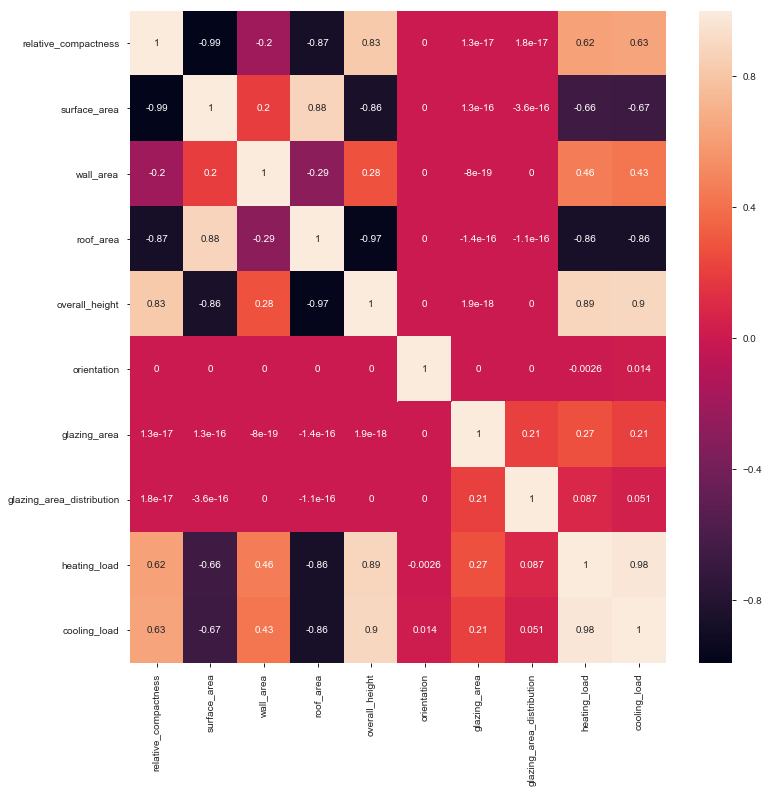

In [139]:
# Preview correlation
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

In [140]:
# Change number format in correlations
pd.set_option('display.float_format',lambda x: '{:,.2f}'.format(x) if abs(x) < 10000 else '{:,.0f}'.format(x))
data.corr()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
relative_compactness,1.00,-0.99,-0.20,-0.87,0.83,0.00,0.00,0.00,0.62,0.63
surface_area,-0.99,1.00,0.20,0.88,-0.86,0.00,0.00,-0.00,-0.66,-0.67
wall_area,-0.20,0.20,1.00,-0.29,0.28,0.00,-0.00,0.00,0.46,0.43
roof_area,-0.87,0.88,-0.29,1.00,-0.97,0.00,-0.00,-0.00,-0.86,-0.86
overall_height,0.83,-0.86,0.28,-0.97,1.00,0.00,0.00,0.00,0.89,0.90
orientation,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.00,0.01
glazing_area,0.00,0.00,-0.00,-0.00,0.00,0.00,1.00,0.21,0.27,0.21
glazing_area_distribution,0.00,-0.00,0.00,-0.00,0.00,0.00,0.21,1.00,0.09,0.05
heating_load,0.62,-0.66,0.46,-0.86,0.89,-0.00,0.27,0.09,1.00,0.98
cooling_load,0.63,-0.67,0.43,-0.86,0.90,0.01,0.21,0.05,0.98,1.00


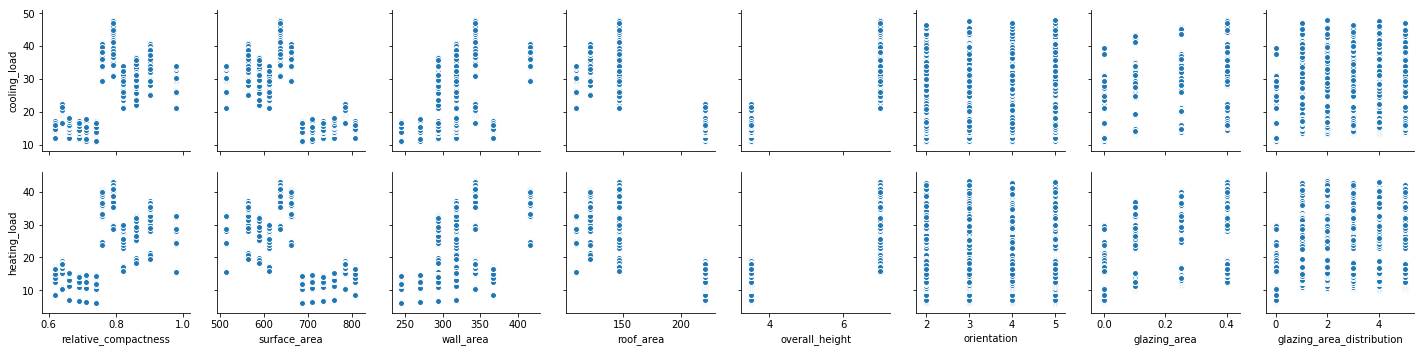

In [9]:
plt.figure(figsize=(5,5))
sns.pairplot(data=data, y_vars=['cooling_load','heating_load'],
             x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                     'orientation', 'glazing_area', 'glazing_area_distribution',])
plt.show()

In [10]:
# Variables & Distribution
pandas_profiling.ProfileReport(data)

Number of variables,10
Number of observations,768
Total Missing (%),0.0%
Total size in memory,60.1 KiB
Average record size in memory,80.1 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,1


#### Data Processing

In [11]:
# Check missing values
data.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [12]:
#Summary statistics
data.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,0.76,671.71,318.50,176.60,5.25,3.50,0.23,2.81,22.31,24.59
std,0.11,88.09,43.63,45.17,1.75,1.12,0.13,1.55,10.09,9.51
min,0.62,514.50,245.00,110.25,3.50,2.00,0.00,0.00,6.01,10.90
25%,0.68,606.38,294.00,140.88,3.50,2.75,0.10,1.75,12.99,15.62
50%,0.75,673.75,318.50,183.75,5.25,3.50,0.25,3.00,18.95,22.08
75%,0.83,741.12,343.00,220.50,7.00,4.25,0.40,4.00,31.67,33.13
max,0.98,808.50,416.50,220.50,7.00,5.00,0.40,5.00,43.10,48.03


In [13]:
X = data.drop(['heating_load','cooling_load'], axis=1)
y = data[['heating_load','cooling_load']]

In [14]:
X.shape

(768, 8)

In [15]:
y.shape

(768, 2)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [18]:
#Create model evaluation function
def evaluate(model, test_features, test_labels):
    from sklearn.metrics import r2_score
    predictions = model.predict(test_features)
    R2 = np.mean(r2_score(test_labels, predictions))
    print('R2 score = %.3f' % R2)
    return r2_score

In [19]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
# Create decision tree model 
dt_model = DecisionTreeRegressor(random_state=15)
# Apply the model
dt_model.fit(X_train_scaled, y_train)
# Predicted value
y_pred1 = dt_model.predict(X_test_scaled)

In [20]:
#R2 score before optimization
R2_before_dt= evaluate(dt_model, X_test_scaled, y_test)

R2 score = 0.964


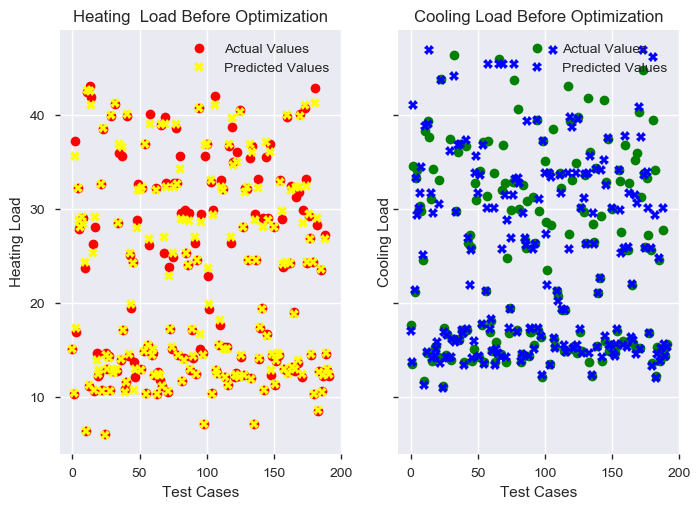

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test_scaled)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test_scaled)),y_pred1[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test_scaled)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test_scaled)),y_pred1[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

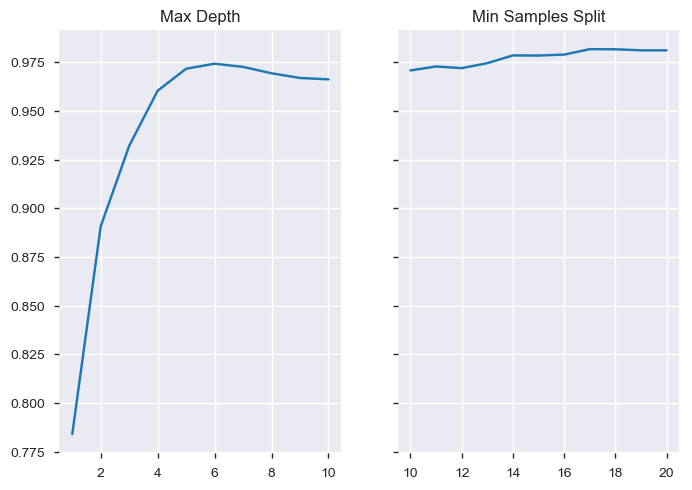

In [22]:
# Finding the best decision tree optimization parameters

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
# Max Depth
dt_acc = []
dt_depth = range(1,11)
for i in dt_depth:
    dt = DecisionTreeRegressor(random_state=123, max_depth=i)
    dt.fit(X_train_scaled, y_train)
    dt_acc.append(dt.score(X_test_scaled, y_test))
ax1.plot(dt_depth,dt_acc)
ax1.set_title('Max Depth')

#Min Samples Split
dt_acc = []
dt_samples_split = range(10,21)
for i in dt_samples_split:
    dt = DecisionTreeRegressor(random_state=123, min_samples_split=i)
    dt.fit(X_train_scaled, y_train)
    dt_acc.append(dt.score(X_test_scaled, y_test))
ax2.plot(dt_samples_split,dt_acc)
ax2.set_title('Min Samples Split')

plt.show()

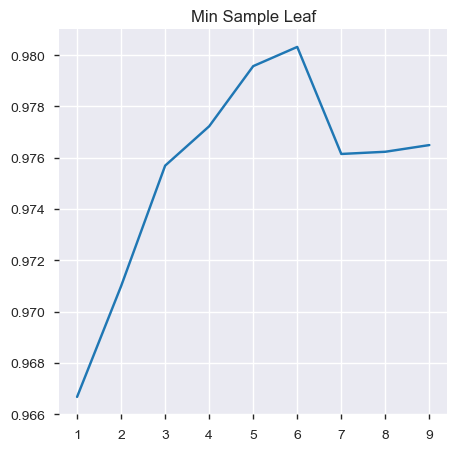

In [23]:
plt.figure(figsize = (5,5))
dt_acc = []
dt_samples_leaf = range(1,10)
for i in dt_samples_leaf:
    dt = DecisionTreeRegressor(random_state=123, min_samples_leaf=i)
    dt.fit(X_train, y_train)
    dt_acc.append(dt.score(X_test, y_test))

plt.plot(dt_samples_leaf,dt_acc)
plt.title('Min Sample Leaf')

plt.show()

In [24]:
# Decision tree optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [7,8,9],
              'min_samples_split': [16,17,18],
              'min_samples_leaf' : [6,7,8]}


#Create new model using the GridSearch
dt_random = GridSearchCV(dt_model, parameters, cv=10)

#Apply the model
dt_random.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=15, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [7, 8, 9], 'min_samples_split': [16, 17, 18], 'min_samples_leaf': [6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
dt_random.best_params_

{'max_depth': 9, 'min_samples_leaf': 6, 'min_samples_split': 16}

In [26]:
# Predicted value
y_pred1_ = dt_random.best_estimator_.predict(X_test_scaled)

In [27]:
#R2 score after optimization
dt_best_random = dt_random.best_estimator_
R2_after_dt= evaluate(dt_best_random, X_test_scaled, y_test)

R2 score = 0.980


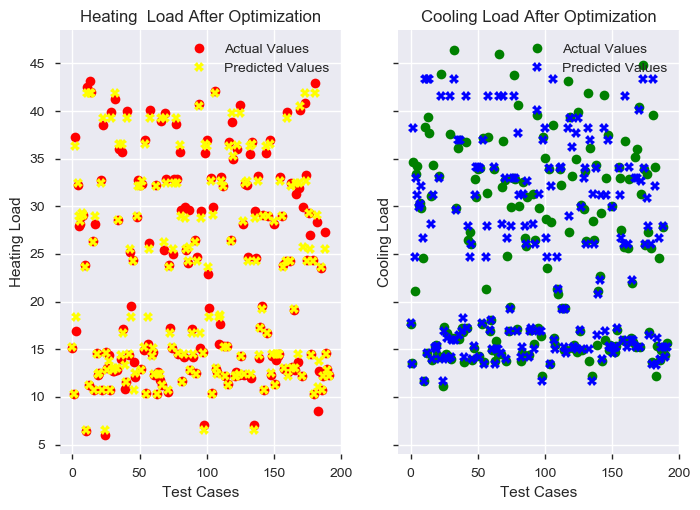

In [28]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test_scaled)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test_scaled)),y_pred1_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test_scaled)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test_scaled)),y_pred1_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()


#### Random Forest

In [29]:
#Import random forest regressor
from sklearn.ensemble import RandomForestRegressor
# Create random forest model 
rf_model = RandomForestRegressor(random_state=15)
# Apply the model
rf_model.fit(X_train_scaled, y_train)
# Predicted value
y_pred2 = rf_model.predict(X_test_scaled)

In [30]:
#R2 score before optimization
R2_before_rf= evaluate(rf_model, X_test_scaled, y_test)

R2 score = 0.979


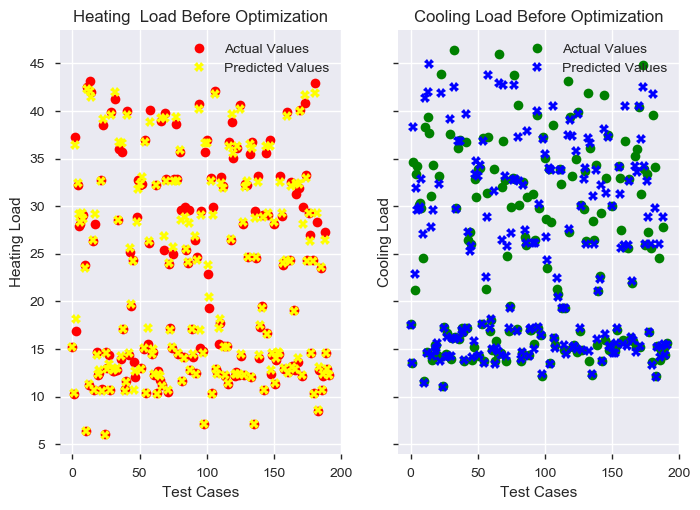

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output before optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test_scaled)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test_scaled)),y_pred2[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load Before Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output before optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test_scaled)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test_scaled)),y_pred2[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load Before Optimization')
ax2.legend(loc = 'upper right')

plt.show()

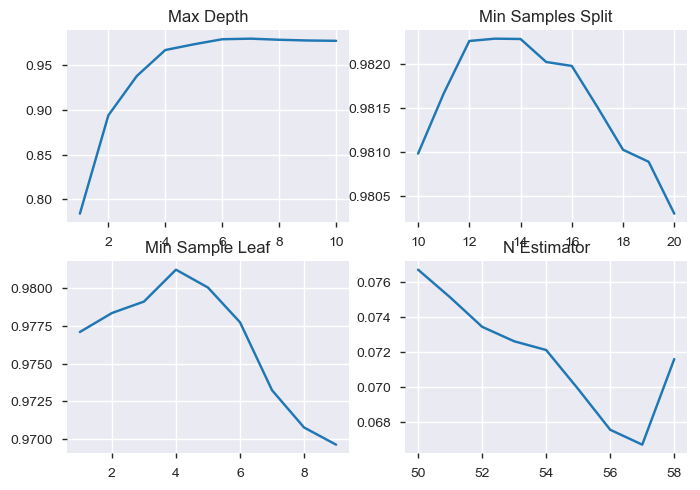

In [32]:
# Finding the best random forest optimization parameters

f, axarr = plt.subplots(2, 2)

# Max Depth
rf_acc = []
rf_depth = range(1,11)
for i in rf_depth:
    rf = RandomForestRegressor(random_state=123, max_depth=i)
    rf.fit(X_train_scaled, y_train)
    rf_acc.append(rf.score(X_test_scaled, y_test))
axarr[0, 0].plot(rf_depth,rf_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
rf_acc = []
rf_samples_split = range(10,21)
for i in rf_samples_split:
    rf = RandomForestRegressor(random_state=123, min_samples_split=i)
    rf.fit(X_train_scaled, y_train)
    rf_acc.append(rf.score(X_test_scaled, y_test))
axarr[0, 1].plot(rf_samples_split,rf_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
rf_acc = []
rf_samples_leaf = range(1,10)
for i in rf_samples_leaf:
    rf = RandomForestRegressor(random_state=123, min_samples_leaf=i)
    rf.fit(X_train_scaled, y_train)
    rf_acc.append(rf.score(X_test_scaled, y_test))

axarr[1, 0].plot(rf_samples_leaf,rf_acc)
axarr[1, 0].set_title('Min Sample Leaf')

#N Estimator
rf_acc = []
rf_estimators = range(50,59)
for i in rf_estimators:
    rf = RandomForestRegressor(random_state=123, n_estimators=i)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.score(X_test_scaled, y_test))

axarr[1, 1].plot(rf_estimators,rf_acc)
axarr[1, 1].set_title('N Estimator')

plt.show()


In [33]:
# Random forest optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [6,7,8],
              'min_samples_split': [11,12,13],
              'min_samples_leaf' : [4,5,6],
              'n_estimators': [49,50,51]}


#Create new model using the GridSearch
rf_random = GridSearchCV(rf_model, parameters, cv=10)

#Apply the model
rf_random.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=15, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [6, 7, 8], 'min_samples_split': [11, 12, 13], 'min_samples_leaf': [4, 5, 6], 'n_estimators': [49, 50, 51]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
#View the best parameters
rf_random.best_params_

{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 51}

In [35]:
# Predicted value
y_pred2_ = rf_random.best_estimator_.predict(X_test_scaled)

In [36]:
#R2 score after optimization
best_random_rf = rf_random.best_estimator_
R2_after_rf= evaluate(best_random_rf, X_test_scaled, y_test)

R2 score = 0.980


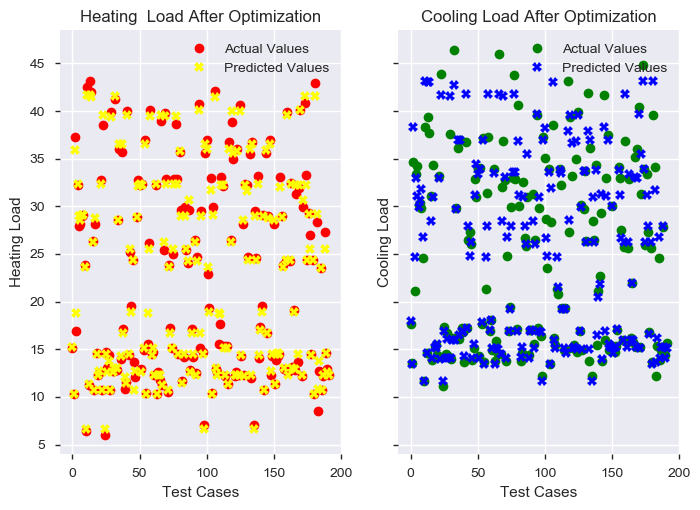

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#Visualize the heating load output after optimization
plt.figure(figsize = (5,5))
ax1.plot(range(0,len(X_test_scaled)),y_test.iloc[:,0],'o',color='red',label = 'Actual Values')
ax1.plot(range(0,len(X_test_scaled)),y_pred2_[:,0],'X',color='yellow',label = 'Predicted Values')
ax1.set_xlabel('Test Cases')
ax1.set_ylabel('Heating Load')
ax1.set_title('Heating  Load After Optimization')
ax1.legend(loc = 'upper right')

#Visualize the cooling load output after optimization
plt.figure(figsize = (5,5))
ax2.plot(range(0,len(X_test_scaled)),y_test.iloc[:,1],'o',color='green',label = 'Actual Values')
ax2.plot(range(0,len(X_test_scaled)),y_pred2_[:,1],'X',color='blue',label = 'Predicted Values')
ax2.set_xlabel('Test Cases')
ax2.set_ylabel('Cooling Load')
ax2.set_title('Cooling Load After Optimization')
ax2.legend(loc = 'upper right')

plt.show()

### Linear Regressor


In [38]:
from sklearn.linear_model import LinearRegression


In [39]:
lr = LinearRegression()

In [40]:
lr.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
y_predict=lr.predict(X_test_scaled)

In [42]:
lr.score(X_test_scaled,y_test)

0.90193095457278816

In [43]:
predictions = lr.predict(X_test_scaled)

In [44]:
from sklearn import metrics
import numpy as np
print('MAE for test data set:', metrics.mean_absolute_error(y_test, predictions))
print('MSE for test data set :', metrics.mean_squared_error(y_test, predictions))
print('RMSE for test data set:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE for test data set: 2.19989054862
MSE for test data set : 9.83342622042
RMSE for test data set: 3.13582943101


In [45]:
from sklearn import metrics

print('MAE for train data set:', metrics.mean_absolute_error(y_train, lr.predict( X_train_scaled)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, lr.predict( X_train_scaled)))
print('RMSE for train data set:', np.sqrt(metrics.mean_squared_error(y_train, lr.predict( X_train_scaled))))

MAE for train data set: 2.1375277811
MSE for train data set : 9.20111375059
RMSE for train data set: 3.03333376841


In [46]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,y,cv=5)
print("Cross validation scores: {}".format(scores))
print("Average cross-validation scroe: {:.2f}".format(scores.mean()))

Cross validation scores: [ 0.81268522  0.87614028  0.9084094   0.91136949  0.90362651]
Average cross-validation scroe: 0.88


###  Ridge & Lasso Regressor

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [48]:
ridge= Ridge(alpha=5 , max_iter= 10000)
param_grid = {'alpha':[0.001,0.05,0.1,1,10,100],
             'max_iter':[1,10,100,1000,10000]}

In [49]:
linridge = Ridge().fit(X_train_scaled, y_train)

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, linridge.predict( X_train_scaled)))

ridge regression linear model intercept: [ 13.90656763  17.7895346 ]
ridge regression linear model coeff:
[[ -6.78932579  -0.96459135   5.32730899  -5.42958436  15.44611314
   -0.23580079   7.68244605   0.8771823 ]
 [ -7.96844046  -1.17518789   3.31535218  -4.14552445  16.36403911
    0.30927129   5.76838015   0.0675117 ]]
R-squared score (training): 0.901
R-squared score (test): 0.895
Number of non-zero features: 16
MSE for train data set : 9.38430832348


In [50]:
print('Ridge regression: effect of alpha regularization parameter\n')

for this_alpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n'
    .format(this_alpha, num_coeff_bigger, r2_train, r2_test))

Ridge regression: effect of alpha regularization parameter

Alpha = 0.00
num abs(coeff) > 1.0: 13,     r-squared training: 0.90, r-squared test: 0.90

Alpha = 1.00
num abs(coeff) > 1.0: 11,     r-squared training: 0.90, r-squared test: 0.90

Alpha = 10.00
num abs(coeff) > 1.0: 10,     r-squared training: 0.89, r-squared test: 0.87

Alpha = 20.00
num abs(coeff) > 1.0: 10,     r-squared training: 0.88, r-squared test: 0.86

Alpha = 50.00
num abs(coeff) > 1.0: 12,     r-squared training: 0.84, r-squared test: 0.81

Alpha = 100.00
num abs(coeff) > 1.0: 12,     r-squared training: 0.78, r-squared test: 0.75

Alpha = 1000.00
num abs(coeff) > 1.0: 4,     r-squared training: 0.33, r-squared test: 0.31



In [51]:
# finding best alpha by gridsearch

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

grid_search= GridSearchCV(ridge,param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
grid_search.best_params_

Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.90


{'alpha': 0.01}

In [53]:
# Ridge model with alpha 0.01

from sklearn.linear_model import Ridge


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=0.01).fit(X_train_scaled, y_train)

   
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, linridge.predict( X_train_scaled)))

ridge regression linear model intercept: [ 27.70581579  33.67418778]
ridge regression linear model coeff:
[[-19.23039761  -7.25840908   1.96348757 -11.20503577  14.2293684
   -0.21591125   7.80509574   0.86778747]
 [-22.38016871  -8.42273133  -0.67776575 -10.70315731  15.08509491
    0.34274071   5.86385157   0.0495004 ]]
R-squared score (training): 0.903
R-squared score (test): 0.902
MSE for train data set : 9.20141872102


### Lasso Regressor

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [55]:
linlasso = Lasso().fit(X_train_scaled, y_train)
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: [ 15.40776271  18.16979661]
lasso regression linear model coeff:
[[  0.          -0.           0.          -0.          13.8160807    0.
    0.           0.        ]
 [  0.          -0.           0.          -0.          12.98038133   0.
    0.           0.        ]]
Non-zero features: 2
R-squared score (training): 0.758
R-squared score (test): 0.737

Features with non-zero weight (sorted by absolute magnitude):


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [56]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [1, 5, 10, 100, 500]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'
         .format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 1.00
Features kept: 2, r-squared training: 0.76, r-squared test: 0.74

Alpha = 5.00
Features kept: 0, r-squared training: -0.00, r-squared test: -0.00

Alpha = 10.00
Features kept: 0, r-squared training: -0.00, r-squared test: -0.00

Alpha = 100.00
Features kept: 0, r-squared training: -0.00, r-squared test: -0.00

Alpha = 500.00
Features kept: 0, r-squared training: -0.00, r-squared test: -0.00



In [57]:
lasso= Lasso(alpha=5 , max_iter= 1000)
param_grid = {'alpha':[0.01,1,2,5,10],
             'max_iter':[1000,10000]}

In [58]:
grid_search.best_params_

{'alpha': 0.01}

In [59]:
from sklearn.cross_validation import cross_val_score

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
scores = cross_val_score(lasso, X, y,cv=5)
print("Cross validation scores: {}".format(scores))

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Cross validation scores: [ 0.46929459  0.77494793  0.85430241  0.79766267  0.76887434]
Best parameters: {'alpha': 0.01}
Best cross-validation score: 0.90


In [61]:
from sklearn.linear_model import Lasso

linlasso = Lasso(alpha=0.01,max_iter=10000).fit(X_train_scaled, y_train)
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('MSE for train data set :', metrics.mean_squared_error(y_train, linlasso.predict( X_train_scaled)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

lasso regression linear model intercept: [ 10.00001211  16.33115178]
lasso regression linear model coeff:
[[ -5.00407325  -0.           5.81155038  -2.79063267  17.1722189
   -0.15519692   7.73670419   0.77855083]
 [ -8.22751385  -0.           2.44784106  -3.25300545  17.99911393
    0.25755364   5.79225443   0.        ]]
Non-zero features: 13
R-squared score (training): 0.901
R-squared score (test): 0.897

MSE for train data set : 9.3770451198
Features with non-zero weight (sorted by absolute magnitude):


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### K nearest neighbor Regressor

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors = 1).fit(X_train_scaled, y_train)
print(knnreg.predict(X_test_scaled))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test_scaled, y_test)))

[[ 18.71  20.72]
 [ 10.55  13.8 ]
 [ 24.23  25.02]
 [ 15.98  24.93]
 [ 37.24  36.38]
 [ 29.05  29.67]
 [ 28.37  29.28]
 [ 41.64  45.59]
 [ 28.4   34.52]
 [ 36.86  34.25]
 [  6.81  11.93]
 [ 29.53  28.99]
 [ 15.12  19.26]
 [ 29.49  27.93]
 [ 29.5   29.56]
 [ 23.59  27.57]
 [ 11.14  14.4 ]
 [ 25.27  31.73]
 [ 16.62  19.9 ]
 [ 12.87  15.85]
 [ 13.01  15.8 ]
 [ 32.69  33.24]
 [ 11.22  14.44]
 [ 25.74  28.27]
 [  6.01  10.94]
 [ 14.71  17.01]
 [ 12.73  13.89]
 [ 12.43  15.59]
 [ 11.16  14.45]
 [ 25.7   26.53]
 [ 15.37  19.18]
 [ 16.66  20.46]
 [ 28.67  32.43]
 [ 17.02  20.48]
 [ 28.55  29.59]
 [ 36.95  36.87]
 [ 14.07  16.11]
 [ 36.64  37.01]
 [ 19.42  22.53]
 [  7.18  12.4 ]
 [ 15.36  19.18]
 [ 39.81  37.76]
 [ 14.58  17.47]
 [ 26.    27.34]
 [ 17.05  23.77]
 [ 29.01  32.85]
 [ 11.16  14.39]
 [ 12.84  16.26]
 [ 28.03  34.45]
 [ 32.06  35.71]
 [ 32.72  33.78]
 [ 15.34  19.32]
 [ 33.24  34.5 ]
 [ 14.12  16.63]
 [ 36.45  36.76]
 [ 10.45  13.79]
 [ 21.46  25.38]
 [ 39.04  45.52]
 [ 26.    27.3

In [63]:
for i in range (1,10):
    knnreg = KNeighborsRegressor(n_neighbors = i).fit(X_train_scaled, y_train)
    
    w=knnreg.score(X_test_scaled,y_test)
    print(i,w)
    # k=7 has the best R-2 value

1 0.738924279286
2 0.865620223686
3 0.899071000105
4 0.905239586822
5 0.910594588717
6 0.909908321049
7 0.91768039734
8 0.917407969602
9 0.917121833334


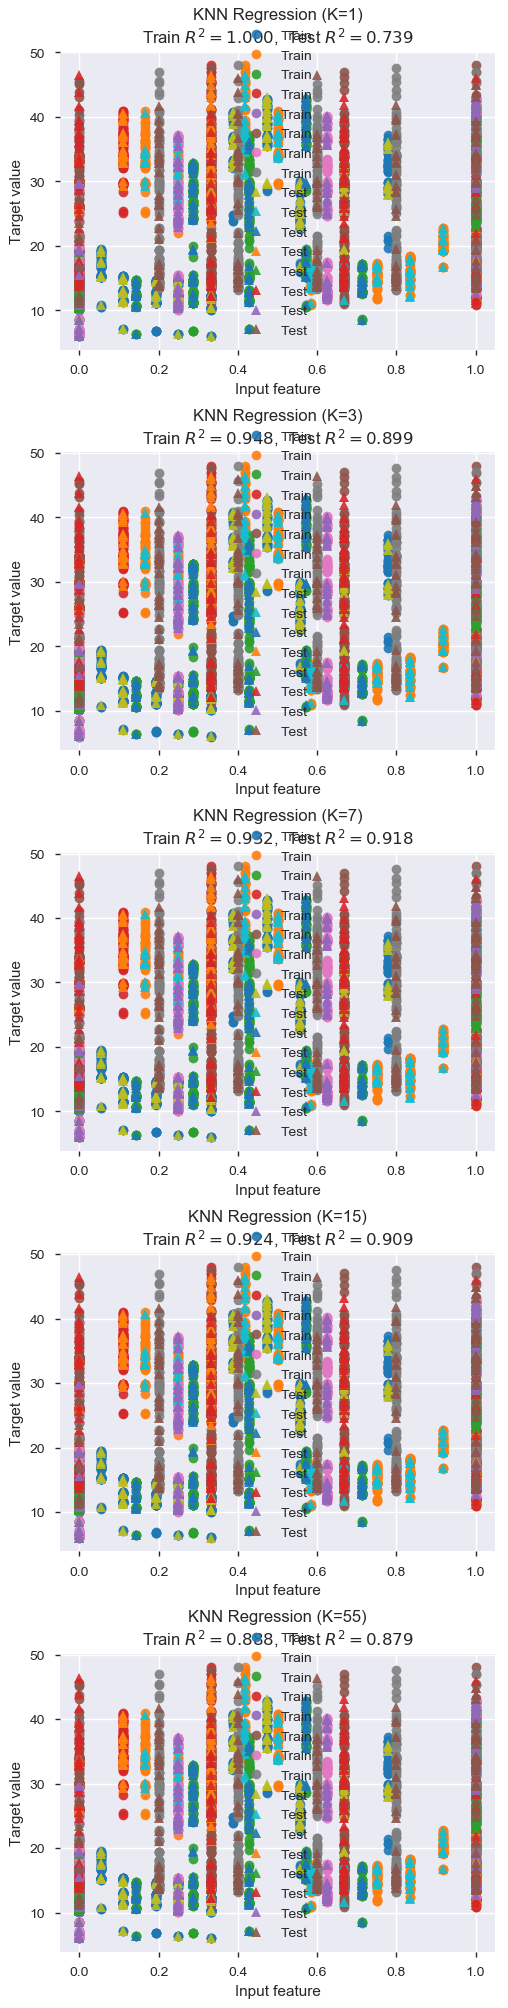

In [64]:
import matplotlib.pyplot as plt
ig, subaxes = plt.subplots(5, 1, figsize=(5,20))

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train_scaled, y_train)
    
    train_score = knnreg.score(X_train_scaled, y_train)
    test_score = knnreg.score(X_test_scaled, y_test)
    
    thisaxis.plot(X_train_scaled, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test_scaled, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [65]:
X = data.drop(['heating_load','cooling_load'], axis=1)
y1 = data[['heating_load']]
y2 = data[['cooling_load']]

### Slicing & Scaling

In [66]:
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=0)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=0)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

### Support vector Regressor with heating load

In [68]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear', epsilon = 0.01)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y1_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

best param:{'C': 10, 'gamma': 1}
R-squared  score(train) : 0.911


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly', epsilon = 0.01, degree=2)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y1_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

best param:{'C': 1000, 'gamma': 1}
R-squared  score(train) : 0.959


In [80]:
# creating SVR model with C=1000 and gamma=1
svr = SVR( epsilon = 0.01,kernel='linear', C=10, gamma=1)
svr_rbf = SVR( epsilon = 0.01,kernel='rbf', C=1000, gamma=1)
svr_poly = SVR( epsilon = 0.01,kernel='poly',degree=2, C=1000, gamma=0.1)

In [82]:
#calculating score and RME
svr.fit(X_train_scaled, y1_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train_scaled,y1_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr.score(X_test_scaled,y1_test)))
print('MSE for train data set :', metrics.mean_squared_error(y1_train, svr.predict(X_train_scaled)))

R-squared  score(train) : 0.914
R-squared  score(test) : 0.901
MSE for train data set : 8.57998091563


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
svr_rbf.fit(X_train_scaled, y1_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(X_train_scaled,y1_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_rbf.score(X_test_scaled,y1_test)))
print('MSE for train data set :', metrics.mean_squared_error(y1_train, svr_rbf.predict( X_train_scaled)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared  score(train) : 0.999
R-squared  score(test) : 0.996
MSE for train data set : 0.128545801421


In [86]:
svr_poly.fit(X_train_scaled, y1_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_poly.score(X_train_scaled,y1_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_poly.score(X_test_scaled,y1_test)))
print('MSE for train data set :', metrics.mean_squared_error(y1_train, svr_poly.predict(X_train_scaled)))

R-squared  score(train) : 0.935
R-squared  score(test) : 0.924
MSE for train data set : 6.50210639274


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026393A51DA0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000026393E8F208>]], dtype=object)

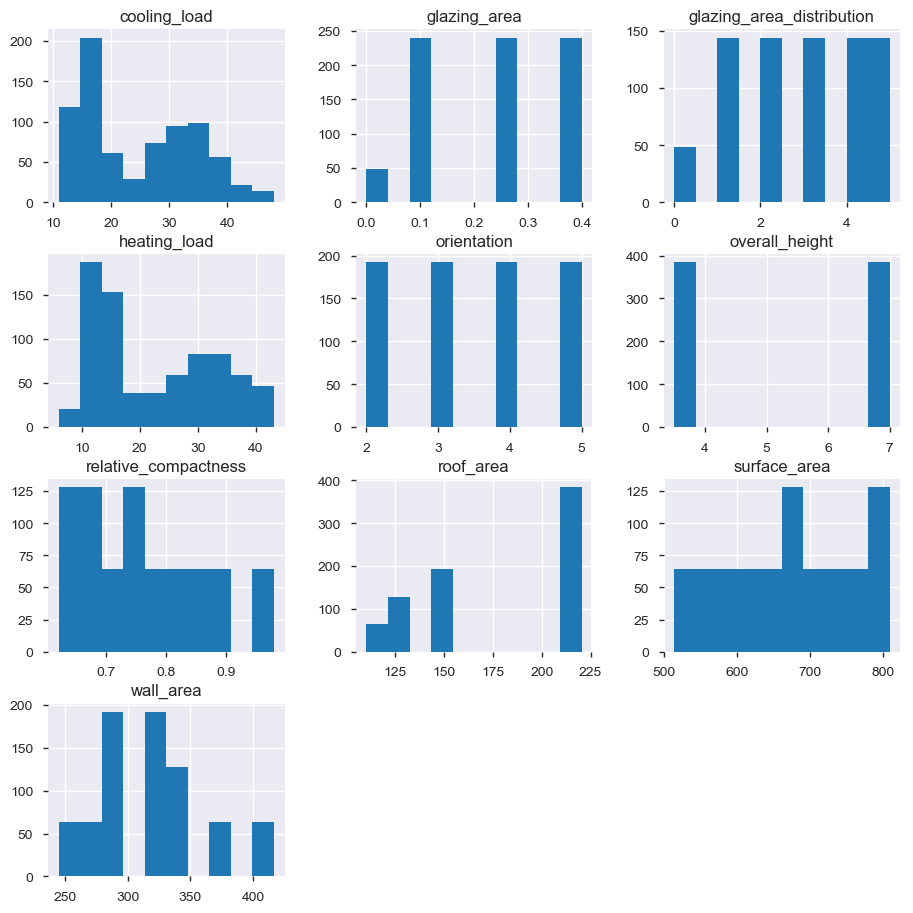

In [87]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

### SVR with cooling load

In [88]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear', epsilon = 0.01)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y2_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

best param:{'C': 10, 'gamma': 1}
R-squared  score(train) : 0.872


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly', epsilon = 0.01, degree=2)
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 
grid = GridSearchCV(svr,param_grid,cv=5)
grid.fit(X_train_scaled, y2_train)

print('best param:{}'
     .format(grid.best_params_))
print('R-squared  score(train) : {:.3f}'
     .format(grid.best_score_))


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

best param:{'C': 1000, 'gamma': 1}
R-squared  score(train) : 0.922


In [90]:
# creating SVR model with C=1000 and gamma=1
svr = SVR( epsilon = 0.01,kernel='linear', C=10, gamma=1)
svr_rbf = SVR( epsilon = 0.01,kernel='rbf', C=1000, gamma=1)
svr_poly = SVR( epsilon = 0.01,kernel='poly',degree=2, C=1000, gamma=1)

In [92]:
#calculating score and RME
svr.fit(X_train_scaled, y2_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr.score(X_train_scaled,y2_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr.score(X_test_scaled,y2_test)))
print('MSE for train data set :', metrics.mean_squared_error(y2_train, svr.predict(X_train_scaled)))

R-squared  score(train) : 0.879
R-squared  score(test) : 0.883
MSE for train data set : 10.8772923551


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [93]:
svr_rbf.fit(X_train_scaled, y2_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_rbf.score(X_train_scaled,y2_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_rbf.score(X_test_scaled,y2_test)))
print('MSE for train data set :', metrics.mean_squared_error(y2_train, svr_rbf.predict( X_train_scaled)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared  score(train) : 0.987
R-squared  score(test) : 0.975
MSE for train data set : 1.17252702063


In [94]:
svr_poly.fit(X_train_scaled, y2_train)

print('R-squared  score(train) : {:.3f}'
     .format(svr_poly.score(X_train_scaled,y2_train)))
print('R-squared  score(test) : {:.3f}'
     .format(svr_poly.score(X_test_scaled,y2_test)))
print('MSE for train data set :', metrics.mean_squared_error(y2_train, svr_poly.predict(X_train_scaled)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R-squared  score(train) : 0.929
R-squared  score(test) : 0.941
MSE for train data set : 6.32494758715


### It is clear that Random Forest has the highest r-2 value (0.98) among all the other regressors

### Classification

In [105]:

X = data.drop(['heating_load','cooling_load'], axis=1)
y1 = data[['heating_load']]
y2 = data[['cooling_load']]

In [97]:
X.shape

(768, 8)

In [106]:
y1.shape

(768, 1)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
relative_compactness         768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
overall_height               768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
heating_load                 768 non-null float64
cooling_load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [114]:
y3=data['heating_load']+data['cooling_load']
print(y3)

0     36.88
1     36.88
2     36.88
3     36.88
4     49.12
5     46.84
6     45.87
7     49.28
8     46.80
9     41.92
10    42.83
11    46.18
12    40.82
13    38.87
14    38.11
15    40.91
16    66.25
17    61.17
18    60.56
19    68.19
20    54.56
21    53.61
22    54.56
23    53.33
24    16.97
25    17.24
26    16.95
27    17.21
28    17.64
29    18.12
       ... 
738   88.10
739   85.66
740   78.19
741   79.52
742   77.10
743   78.04
744   31.10
745   30.81
746   31.11
747   31.09
748   28.02
749   27.21
750   28.09
751   27.73
752   30.75
753   30.15
754   30.91
755   30.95
756   32.60
757   32.71
758   32.47
759   33.22
760   38.51
761   38.40
762   38.87
763   39.28
764   33.42
765   33.55
766   33.09
767   32.67
Length: 768, dtype: float64


In [121]:
#sLength = len(data['cooling_load'])

In [122]:
#data['Total_load'] = pd.Series(np.random.randn(sLength), index=y3.index)

In [127]:
y3.columns = [['Total_load']]

In [142]:
y3.describe()

count   768.00
mean     46.89
std      19.48
min      16.95
25%      28.75
50%      40.97
75%      64.34
max      89.95
dtype: float64

In [145]:
data['Total_load']=y3

In [146]:
data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load,Total_load
0,0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33,36.88
1,0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33,36.88
2,0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33,36.88
3,0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33,36.88
4,0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28,49.12


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
relative_compactness         768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
overall_height               768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
heating_load                 768 non-null float64
cooling_load                 768 non-null float64
Total_load                   768 non-null float64
dtypes: float64(9), int64(2)
memory usage: 66.1 KB


In [370]:
conditions = [
    (data['Total_load'] < 40),
    (data['Total_load'] > 40) & (data['Total_load'] < 65),
    (data['Total_load'] > 65)]
choices = ['low', 'medium', 'high']
data['Temp_Range'] = np.select(conditions, choices,default=-1)
data.loc[:,['Total_load','Temp_Range']]

,Total_load,Temp_Range
0,36.88,low
1,36.88,low
2,36.88,low
3,36.88,low
4,49.12,medium
5,46.84,medium
6,45.87,medium
7,49.28,medium
8,46.80,medium
9,41.92,medium


In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 12 columns):
relative_compactness         768 non-null float64
surface_area                 768 non-null float64
wall_area                    768 non-null float64
roof_area                    768 non-null float64
overall_height               768 non-null float64
orientation                  768 non-null int64
glazing_area                 768 non-null float64
glazing_area_distribution    768 non-null int64
heating_load                 768 non-null float64
cooling_load                 768 non-null float64
Total_load                   768 non-null float64
Temp_Range                   768 non-null object
dtypes: float64(9), int64(2), object(1)
memory usage: 72.1+ KB


In [372]:

y = data[['Temp_Range']]


In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [374]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

In [375]:
X_train_scaled.describe()

,0,1,2,3,4,5,6,7
count,576.00,576.00,576.00,576.00,576.00,576.00,576.00,576.00
mean,0.39,0.54,0.43,0.61,0.49,0.49,0.59,0.56
std,0.29,0.30,0.25,0.41,0.50,0.37,0.33,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.11,0.31,0.29,0.33,0.00,0.33,0.25,0.40
50%,0.33,0.58,0.43,1.00,0.00,0.33,0.62,0.60
75%,0.58,0.83,0.57,1.00,1.00,0.67,1.00,0.80
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### Knn Classification

In [291]:
knn = KNeighborsClassifier()
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]
knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train_scaled,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [292]:
knn_clf.best_params_

{'n_neighbors': 10}

In [294]:
KNN_best = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(KNN_best.score(X_train_scaled, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(KNN_best.score(X_test_scaled, y_test)))

Accuracy of KNN classifier on training set: 0.91
Accuracy of KNN classifier on test set: 0.91


C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [295]:
from sklearn.ensemble import BaggingClassifier

bag_knnclf = BaggingClassifier(KNN_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_knnclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_knnclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_knnclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.90
Test score: 0.91


### KNN pasting

In [296]:
past_knnclf = BaggingClassifier(KNN_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_knnclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_knnclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_knnclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.91
Test score: 0.91


### KNN PCA

#### standardizing the data

In [297]:
from sklearn.preprocessing import StandardScaler
X_train_standard = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test_standard = pd.DataFrame(StandardScaler().fit_transform(X_test))
X_train_standard.describe()

,0,1,2,3,4,5,6,7
count,576.00,576.00,576.00,576.00,576.00,576.00,576.00,576.00
mean,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.35,-1.82,-1.71,-1.50,-0.98,-1.33,-1.78,-1.83
25%,-0.97,-0.77,-0.58,-0.68,-0.98,-0.43,-1.03,-0.53
50%,-0.20,0.13,-0.01,0.95,-0.98,-0.43,0.10,0.12
75%,0.66,0.97,0.56,0.95,1.02,0.47,1.22,0.78
max,2.09,1.53,2.27,0.95,1.02,1.37,1.22,1.43


In [298]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_standard)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

5

In [299]:
pca.explained_variance_ratio_.sum()

0.99999999999999989

In [300]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train_standard)

In [301]:
pca.n_components_

5

In [302]:
pca = PCA(n_components = 5)
X_train_reduced = pca.fit_transform(X_train_standard)
X_train_recovered = pca.inverse_transform(X_train_reduced)
X_test_reduced = pca.fit_transform(X_test_standard)
X_test_recovered = pca.inverse_transform(X_test_reduced)

In [303]:
print("Shape of X_train_standard :" +str(X_train_standard.shape))
print("Shape of X_train_reduced :" +str(X_train_reduced.shape))
print("Shape of X_test_standard :" +str(X_test_standard.shape))
print("Shape of X_test_reduced :" +str(X_test_reduced.shape))

Shape of X_train_standard :(576, 8)
Shape of X_train_reduced :(576, 5)
Shape of X_test_standard :(192, 8)
Shape of X_test_reduced :(192, 5)


### PCA-Knn with GridSearch using CV

In [304]:
k = np.arange(10)+1
param_knn= {'n_neighbors':k}
knn_pca_clf = GridSearchCV(knn, param_knn, cv=5)
knn_pca_clf.fit(X_train_scaled,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [305]:
knn_pca_clf.best_params_

{'n_neighbors': 10}

In [306]:
knn_pca_clf_best = KNeighborsClassifier(n_neighbors=10).fit(X_train_scaled, y_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn_pca_clf_best.score(X_train_scaled, y_train)))
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn_pca_clf_best.score(X_test_scaled, y_test)))

Accuracy of KNN classifier on training set: 0.91
Accuracy of KNN classifier on test set: 0.91


C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


### Logistic

In [307]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1', 'l2'] }

In [308]:
logit_clf = GridSearchCV(logit, param_grid,cv=5)
logit_clf.fit(X_train_scaled,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [309]:
logit_clf.best_params_

{'C': 1000, 'penalty': 'l1'}

In [310]:
logit_clf_best = LogisticRegression(C=1000, penalty = 'l1')
logit_clf_best.fit(X_train_scaled,y_train)

print('Accuracy of logistic regression on training set: {:.2f}'
     .format(logit_clf_best.score(X_train_scaled, y_train)))
print('Accuracy of logistic regression on test set: {:.2f}'
     .format(logit_clf_best.score(X_test_scaled, y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression on training set: 0.87
Accuracy of logistic regression on test set: 0.89


### Bagging

In [311]:
from sklearn.ensemble import BaggingClassifier

bag_logitclf = BaggingClassifier(logit_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_logitclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.87
Test score: 0.88


### Pasting

In [312]:
from sklearn.ensemble import BaggingClassifier

past_logitclf = BaggingClassifier(logit_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_logitclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.87
Test score: 0.89


### AdaBoosting

In [313]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_logitclf = AdaBoostClassifier(base_estimator = logit_clf_best)

param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
GridSearch_logit = GridSearchCV(adaboost_logitclf, param_grid,cv=5)
GridSearch_logit.fit(X_train_scaled,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [314]:
GridSearch_logit.best_params_

{'learning_rate': 0.4}

In [316]:
adaboost_logitclf_best = AdaBoostClassifier(base_estimator = logit_clf_best, learning_rate = 0.4)
adaboost_logitclf_best.fit(X_train_scaled,y_train)

print('Train score: {0:0.2f}'.format(adaboost_logitclf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_logitclf_best.score(X_test_scaled, y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.77
Test score: 0.79


### Linear SVM

In [317]:
from sklearn.svm import SVC
LinSVC = SVC(kernel='linear')
LinSVM_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [318]:
LinSVC_clf = GridSearchCV(LinSVC, LinSVM_params,cv=5)
LinSVC_clf.fit(X_train_scaled,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [319]:
LinSVC_clf.best_params_

{'C': 1000}

In [320]:
print('Accuracy of linear SVM on training set: {:.2f}'
     .format(LinSVC_clf.score(X_train_scaled, y_train)))
print('Accuracy of linear SVM on test set: {:.2f}'
     .format(LinSVC_clf.score(X_test_scaled, y_test)))

Accuracy of linear SVM on training set: 0.93
Accuracy of linear SVM on test set: 0.93


In [321]:
from sklearn.metrics import confusion_matrix
LinSVC_best = SVC(kernel='linear',C=1).fit(X_train_scaled, y_train)
LinSVC_predicted = LinSVC_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, LinSVC_predicted)

print('Linear SVM \n', confusion)

Linear SVM 
 [[45  0  6]
 [ 0 43  8]
 [ 3  4 83]]


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [322]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LinSVC_predicted))

             precision    recall  f1-score   support

       high       0.94      0.88      0.91        51
        low       0.91      0.84      0.88        51
     medium       0.86      0.92      0.89        90

avg / total       0.89      0.89      0.89       192



### Bagging

In [323]:
bag_LinSVC = BaggingClassifier(LinSVC_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_LinSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.87
Test score: 0.88


### Pasting

In [324]:
past_LinSVC = BaggingClassifier(LinSVC_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_LinSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.87
Test score: 0.89


### Kernelized SVM

In [325]:
from sklearn.svm import SVC 
KernelSVC = SVC()
kernelSVC_params = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf','poly']}

In [326]:
KernelSVC_clf = GridSearchCV(KernelSVC, kernelSVC_params,cv=5)
KernelSVC_clf.fit(X_train_scaled,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [327]:
KernelSVC_clf.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [328]:
print('Accuracy of Kernelized SVM on training set: {:.2f}'
     .format(KernelSVC_clf.score(X_train_scaled, y_train)))
print('Accuracy of Kernelized SVM on test set: {:.2f}'
     .format(KernelSVC_clf.score(X_test_scaled, y_test)))

Accuracy of Kernelized SVM on training set: 0.94
Accuracy of Kernelized SVM on test set: 0.94


In [329]:
from sklearn.metrics import confusion_matrix
KernelSVC_best = SVC(kernel='rbf',C=1000,gamma=0.1).fit(X_train_scaled, y_train)
KernelSVC_predicted = KernelSVC_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, KernelSVC_predicted)

print('Kernelized SVM \n', confusion)

Kernelized SVM 
 [[48  0  3]
 [ 0 48  3]
 [ 3  2 85]]


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [330]:
from sklearn.metrics import classification_report
print(classification_report(y_test, KernelSVC_predicted))

             precision    recall  f1-score   support

       high       0.94      0.94      0.94        51
        low       0.96      0.94      0.95        51
     medium       0.93      0.94      0.94        90

avg / total       0.94      0.94      0.94       192



### Bagging

In [331]:
bag_KernelSVC = BaggingClassifier(KernelSVC_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_KernelSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_logitclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.87
Test score: 0.88


### Pasting

In [332]:
past_KernelSVC = BaggingClassifier(KernelSVC_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_KernelSVC.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_logitclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_logitclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.87
Test score: 0.89


### Decision Tree

In [333]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
param_grid = {'max_depth': [5, 10, 20, 50, 100]}

grid_search = GridSearchCV(dt_clf, param_grid, cv = 5, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [334]:
grid_search.best_params_

{'max_depth': 10}

In [335]:
grid_search.best_score_

0.95659722222222221

In [336]:
dt_clf_best = DecisionTreeClassifier(max_depth = 10)
dt_clf_best.fit(X_train_scaled,y_train)

print('Train score: {0:0.2f}'.format(dt_clf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.2f}'.format(dt_clf_best.score(X_test_scaled, y_test)))

Train score: 0.99
Test score: 0.95


In [337]:
from sklearn.metrics import confusion_matrix
dt_predicted = dt_clf_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, dt_predicted)

print('Decision Tree \n', confusion)

Decision Tree 
 [[49  0  2]
 [ 0 49  2]
 [ 4  2 84]]


In [338]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_predicted))

             precision    recall  f1-score   support

       high       0.92      0.96      0.94        51
        low       0.96      0.96      0.96        51
     medium       0.95      0.93      0.94        90

avg / total       0.95      0.95      0.95       192



### Bagging

In [339]:
from sklearn.ensemble import BaggingClassifier

bag_dtclf = BaggingClassifier(dt_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_dtclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_dtclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_dtclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 1.00
Test score: 0.95


### Pasting

In [340]:
from sklearn.ensemble import BaggingClassifier

past_dtclf = BaggingClassifier(dt_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_dtclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_dtclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_dtclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.99
Test score: 0.95


### AdaBoost

In [341]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_dtclf = AdaBoostClassifier(base_estimator = dt_clf_best)
param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

GridSearch_dtclf = GridSearchCV(adaboost_dtclf, param_grid,cv=5)
GridSearch_dtclf.fit(X_train_scaled,y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [342]:
GridSearch_dtclf.best_params_

{'learning_rate': 0.2}

In [343]:
adaboost_dtclf_best = AdaBoostClassifier(dt_clf_best,learning_rate=0.2)
adaboost_dtclf_best.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(adaboost_dtclf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_dtclf_best.score(X_test_scaled, y_test)))

Train score: 1.00
Test score: 0.94


C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Gradient Boost

In [344]:
from sklearn.ensemble import GradientBoostingClassifier

gb_dtclf = GradientBoostingClassifier()
param_grid = {'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

GridSearch_gb_dtclf = GridSearchCV(gb_dtclf, param_grid,cv=5)
GridSearch_gb_dtclf.fit(X_train_scaled,y_train)

GridSearch_gb_dtclf.best_params_

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'learning_rate': 0.1}

In [345]:
gb_dtclf_best = GradientBoostingClassifier(learning_rate=0.1)
gb_dtclf_best.fit(X_train,y_train)

print('Train score: {0:0.2f}'.format(gb_dtclf_best.score(X_train, y_train)))
print('Test score: {0:0.2f}'.format(gb_dtclf_best.score(X_test, y_test)))
print('Feature Importance: '.format(gb_dtclf_best.feature_importances_))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.99
Test score: 0.95
Feature Importance: 


### Random Forest

In [346]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20],
    'criterion' :['gini', 'entropy']
}

gs_rf_clf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv= 5)
gs_rf_clf.fit(X_train_scaled, y_train)

gs_rf_clf.best_params_

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y wa

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 100}

In [347]:
rf_clf_best = RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 100, max_depth=6, criterion='entropy')
rf_clf_best.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(rf_clf_best.score(X_train_scaled, y_train)))
print('Test score: {0:0.2f}'.format(rf_clf_best.score(X_test_scaled, y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train score: 0.97
Test score: 0.96


In [348]:
from sklearn.metrics import confusion_matrix
rf_predicted = rf_clf_best.predict(X_test_scaled)
confusion = confusion_matrix(y_test, rf_predicted)

print('Decision Tree \n', confusion)

Decision Tree 
 [[49  0  2]
 [ 0 48  3]
 [ 0  2 88]]


In [349]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_predicted))

             precision    recall  f1-score   support

       high       1.00      0.96      0.98        51
        low       0.96      0.94      0.95        51
     medium       0.95      0.98      0.96        90

avg / total       0.96      0.96      0.96       192



### Bagging

In [350]:
from sklearn.ensemble import BaggingClassifier

bag_rfclf = BaggingClassifier(rf_clf_best, n_estimators=100, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=10)

bag_rfclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(bag_rfclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(bag_rfclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.97
Test score: 0.96


### Pasting

In [351]:
from sklearn.ensemble import BaggingClassifier

past_rfclf = BaggingClassifier(rf_clf_best, n_estimators=100, max_samples=1.0, bootstrap=False, n_jobs=-1, random_state=10)

past_rfclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(past_rfclf.score(X_train_scaled,y_train)))
print('Test score: {0:0.2f}'.format(past_rfclf.score(X_test_scaled,y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.98
Test score: 0.96


### AdaBoost

In [352]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_rfclf = AdaBoostClassifier(base_estimator = rf_clf_best, learning_rate = 0.5)
adaboost_rfclf.fit(X_train_scaled, y_train)

print('Train score: {0:0.2f}'.format(adaboost_rfclf.score(X_train_scaled, y_train)))
print('Test score: {0:0.2f}'.format(adaboost_rfclf.score(X_test_scaled, y_test)))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train score: 0.98
Test score: 0.95


### Ensemble

In [254]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('knn', past_knnclf), ('lr', logit_clf_best), ('dt',bag_dtclf), ('rf',rf_clf_best), ('svc', KernelSVC_clf)], voting='hard')
voting_clf.fit(X_train_scaled, y_train)

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('knn', BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [255]:
from sklearn.metrics import accuracy_score

for clf in (past_knnclf, logit_clf_best, bag_dtclf, rf_clf_best, KernelSVC_clf, voting_clf):
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier 0.859375
LogisticRegression 0.875
BaggingClassifier 0.947916666667
RandomForestClassifier 0.963541666667


C:\Users\chand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV 0.942708333333
VotingClassifier 0.942708333333


### Deep Learning

In [383]:
y.head()


,Temp_Range
0,low
1,low
2,low
3,low
4,medium


In [377]:
y_final_train=pd.get_dummies(data=y_train['Temp_Range'])

In [378]:
y_final_train.head()

,high,low,medium
762,0,1,0
127,0,1,0
564,0,1,0
375,0,1,0
663,0,1,0


In [379]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(8,activation='relu',input_dim=8))
model.add(Dense(12,activation='relu'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))

In [380]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [381]:
model.fit(X_train_scaled,y_final_train,epochs=1000,batch_size=32)

Epoch 1/1000
576/576 [==============================] - 0s 588us/step - loss: 0.6791 - acc: 0.5428
Epoch 2/1000
576/576 [==============================] - 0s 37us/step - loss: 0.6564 - acc: 0.6568
Epoch 3/1000
576/576 [==============================] - 0s 37us/step - loss: 0.6379 - acc: 0.6667
Epoch 4/1000
576/576 [==============================] - 0s 35us/step - loss: 0.6217 - acc: 0.7025
Epoch 5/1000
576/576 [==============================] - 0s 37us/step - loss: 0.6048 - acc: 0.7870
Epoch 6/1000
576/576 [==============================] - 0s 49us/step - loss: 0.5862 - acc: 0.8015
Epoch 7/1000
576/576 [==============================] - 0s 37us/step - loss: 0.5658 - acc: 0.7980
Epoch 8/1000
576/576 [==============================] - 0s 35us/step - loss: 0.5433 - acc: 0.8119
Epoch 9/1000
576/576 [==============================] - 0s 37us/step - loss: 0.5186 - acc: 0.8223
Epoch 10/1000
576/576 [==============================] - 0s 37us/step - loss: 0.4923 - acc: 0.8247
Epoch 11/1000
576/

576/576 [==============================] - 0s 37us/step - loss: 0.2643 - acc: 0.9167
Epoch 84/1000
576/576 [==============================] - 0s 40us/step - loss: 0.2635 - acc: 0.9167
Epoch 85/1000
576/576 [==============================] - 0s 47us/step - loss: 0.2625 - acc: 0.9167
Epoch 86/1000
576/576 [==============================] - 0s 37us/step - loss: 0.2618 - acc: 0.9167
Epoch 87/1000
576/576 [==============================] - 0s 37us/step - loss: 0.2611 - acc: 0.9167
Epoch 88/1000
576/576 [==============================] - 0s 37us/step - loss: 0.2602 - acc: 0.9167
Epoch 89/1000
576/576 [==============================] - 0s 50us/step - loss: 0.2595 - acc: 0.9167
Epoch 90/1000
576/576 [==============================] - 0s 37us/step - loss: 0.2587 - acc: 0.9167
Epoch 91/1000
576/576 [==============================] - 0s 40us/step - loss: 0.2580 - acc: 0.9167
Epoch 92/1000
576/576 [==============================] - 0s 47us/step - loss: 0.2572 - acc: 0.9167
Epoch 93/1000
576/576 [=

576/576 [==============================] - 0s 35us/step - loss: 0.2043 - acc: 0.9271
Epoch 166/1000
576/576 [==============================] - 0s 38us/step - loss: 0.2036 - acc: 0.9300
Epoch 167/1000
576/576 [==============================] - 0s 37us/step - loss: 0.2029 - acc: 0.9311
Epoch 168/1000
576/576 [==============================] - 0s 47us/step - loss: 0.2023 - acc: 0.9294
Epoch 169/1000
576/576 [==============================] - 0s 38us/step - loss: 0.2018 - acc: 0.9311
Epoch 170/1000
576/576 [==============================] - 0s 38us/step - loss: 0.2011 - acc: 0.9311
Epoch 171/1000
576/576 [==============================] - 0s 38us/step - loss: 0.2002 - acc: 0.9311
Epoch 172/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1996 - acc: 0.9317
Epoch 173/1000
576/576 [==============================] - 0s 52us/step - loss: 0.1991 - acc: 0.9311
Epoch 174/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1984 - acc: 0.9311
Epoch 175/1000


576/576 [==============================] - 0s 40us/step - loss: 0.1622 - acc: 0.9578
Epoch 248/1000
576/576 [==============================] - 0s 57us/step - loss: 0.1620 - acc: 0.9578
Epoch 249/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1614 - acc: 0.9572
Epoch 250/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1610 - acc: 0.9572
Epoch 251/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1609 - acc: 0.9583
Epoch 252/1000
576/576 [==============================] - 0s 49us/step - loss: 0.1603 - acc: 0.9578
Epoch 253/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1598 - acc: 0.9595
Epoch 254/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1595 - acc: 0.9589
Epoch 255/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1591 - acc: 0.9595
Epoch 256/1000
576/576 [==============================] - 0s 50us/step - loss: 0.1589 - acc: 0.9583
Epoch 257/1000


576/576 [==============================] - 0s 38us/step - loss: 0.1383 - acc: 0.9688
Epoch 330/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1380 - acc: 0.9705
Epoch 331/1000
576/576 [==============================] - 0s 57us/step - loss: 0.1373 - acc: 0.9699
Epoch 332/1000
576/576 [==============================] - 0s 45us/step - loss: 0.1376 - acc: 0.9699
Epoch 333/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1375 - acc: 0.9688
Epoch 334/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1372 - acc: 0.9688
Epoch 335/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1367 - acc: 0.9699
Epoch 336/1000
576/576 [==============================] - 0s 64us/step - loss: 0.1363 - acc: 0.9699
Epoch 337/1000
576/576 [==============================] - 0s 44us/step - loss: 0.1362 - acc: 0.9705
Epoch 338/1000
576/576 [==============================] - 0s 49us/step - loss: 0.1359 - acc: 0.9705
Epoch 339/1000


576/576 [==============================] - 0s 40us/step - loss: 0.1243 - acc: 0.9711
Epoch 412/1000
576/576 [==============================] - 0s 56us/step - loss: 0.1249 - acc: 0.9693
Epoch 413/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1264 - acc: 0.9653
Epoch 414/1000
576/576 [==============================] - 0s 57us/step - loss: 0.1250 - acc: 0.9688
Epoch 415/1000
576/576 [==============================] - 0s 63us/step - loss: 0.1249 - acc: 0.9693
Epoch 416/1000
576/576 [==============================] - 0s 92us/step - loss: 0.1235 - acc: 0.9716
Epoch 417/1000
576/576 [==============================] - 0s 153us/step - loss: 0.1236 - acc: 0.9699
Epoch 418/1000
576/576 [==============================] - 0s 106us/step - loss: 0.1234 - acc: 0.9711
Epoch 419/1000
576/576 [==============================] - 0s 256us/step - loss: 0.1232 - acc: 0.9699
Epoch 420/1000
576/576 [==============================] - 0s 132us/step - loss: 0.1234 - acc: 0.9716
Epoch 421/1

576/576 [==============================] - 0s 49us/step - loss: 0.1175 - acc: 0.9676
Epoch 494/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1163 - acc: 0.9711
Epoch 495/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1165 - acc: 0.9699
Epoch 496/1000
576/576 [==============================] - 0s 45us/step - loss: 0.1159 - acc: 0.9722
Epoch 497/1000
576/576 [==============================] - 0s 50us/step - loss: 0.1167 - acc: 0.9676
Epoch 498/1000
576/576 [==============================] - 0s 44us/step - loss: 0.1159 - acc: 0.9728
Epoch 499/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1195 - acc: 0.9659
Epoch 500/1000
576/576 [==============================] - 0s 44us/step - loss: 0.1175 - acc: 0.9693
Epoch 501/1000
576/576 [==============================] - 0s 50us/step - loss: 0.1164 - acc: 0.9705
Epoch 502/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1159 - acc: 0.9716
Epoch 503/1000


576/576 [==============================] - 0s 63us/step - loss: 0.1113 - acc: 0.9711
Epoch 576/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1113 - acc: 0.9722
Epoch 577/1000
576/576 [==============================] - 0s 57us/step - loss: 0.1150 - acc: 0.9670
Epoch 578/1000
576/576 [==============================] - 0s 52us/step - loss: 0.1131 - acc: 0.9653
Epoch 579/1000
576/576 [==============================] - 0s 49us/step - loss: 0.1117 - acc: 0.9722
Epoch 580/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1115 - acc: 0.9716
Epoch 581/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1115 - acc: 0.9711
Epoch 582/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1109 - acc: 0.9699
Epoch 583/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1109 - acc: 0.9711
Epoch 584/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1113 - acc: 0.9711
Epoch 585/1000


576/576 [==============================] - 0s 37us/step - loss: 0.1078 - acc: 0.9711
Epoch 657/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1078 - acc: 0.9711
Epoch 658/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1082 - acc: 0.9716
Epoch 659/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1077 - acc: 0.9722
Epoch 660/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1078 - acc: 0.9722
Epoch 661/1000
576/576 [==============================] - 0s 44us/step - loss: 0.1084 - acc: 0.9705
Epoch 662/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1081 - acc: 0.9711
Epoch 663/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1078 - acc: 0.9722
Epoch 664/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1073 - acc: 0.9722
Epoch 665/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1086 - acc: 0.9693
Epoch 666/1000


576/576 [==============================] - 0s 57us/step - loss: 0.1059 - acc: 0.9711
Epoch 739/1000
576/576 [==============================] - 0s 78us/step - loss: 0.1055 - acc: 0.9705
Epoch 740/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1050 - acc: 0.9722
Epoch 741/1000
576/576 [==============================] - 0s 54us/step - loss: 0.1056 - acc: 0.9716
Epoch 742/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1056 - acc: 0.9693
Epoch 743/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1068 - acc: 0.9688
Epoch 744/1000
576/576 [==============================] - 0s 50us/step - loss: 0.1060 - acc: 0.9716
Epoch 745/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1047 - acc: 0.9734
Epoch 746/1000
576/576 [==============================] - 0s 35us/step - loss: 0.1058 - acc: 0.9711
Epoch 747/1000
576/576 [==============================] - 0s 49us/step - loss: 0.1062 - acc: 0.9716
Epoch 748/1000


576/576 [==============================] - 0s 37us/step - loss: 0.1035 - acc: 0.9722
Epoch 821/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1034 - acc: 0.9705
Epoch 822/1000
576/576 [==============================] - 0s 50us/step - loss: 0.1038 - acc: 0.9716
Epoch 823/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1035 - acc: 0.9716
Epoch 824/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1034 - acc: 0.9716
Epoch 825/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1045 - acc: 0.9699
Epoch 826/1000
576/576 [==============================] - 0s 56us/step - loss: 0.1032 - acc: 0.9722
Epoch 827/1000
576/576 [==============================] - 0s 35us/step - loss: 0.1043 - acc: 0.9699
Epoch 828/1000
576/576 [==============================] - 0s 45us/step - loss: 0.1036 - acc: 0.9722
Epoch 829/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1049 - acc: 0.9676
Epoch 830/1000


576/576 [==============================] - 0s 52us/step - loss: 0.1019 - acc: 0.9722
Epoch 903/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1029 - acc: 0.9699
Epoch 904/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1025 - acc: 0.9682
Epoch 905/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1028 - acc: 0.9699
Epoch 906/1000
576/576 [==============================] - 0s 49us/step - loss: 0.1016 - acc: 0.9722
Epoch 907/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1034 - acc: 0.9705
Epoch 908/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1020 - acc: 0.9722
Epoch 909/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1020 - acc: 0.9728
Epoch 910/1000
576/576 [==============================] - 0s 45us/step - loss: 0.1028 - acc: 0.9711
Epoch 911/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1024 - acc: 0.9693
Epoch 912/1000


576/576 [==============================] - 0s 42us/step - loss: 0.1015 - acc: 0.9711
Epoch 984/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1010 - acc: 0.9711
Epoch 985/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1009 - acc: 0.9693
Epoch 986/1000
576/576 [==============================] - 0s 50us/step - loss: 0.1008 - acc: 0.9705
Epoch 987/1000
576/576 [==============================] - 0s 38us/step - loss: 0.1010 - acc: 0.9699
Epoch 988/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1006 - acc: 0.9716
Epoch 989/1000
576/576 [==============================] - 0s 40us/step - loss: 0.1007 - acc: 0.9728
Epoch 990/1000
576/576 [==============================] - 0s 42us/step - loss: 0.1023 - acc: 0.9682
Epoch 991/1000
576/576 [==============================] - 0s 37us/step - loss: 0.1073 - acc: 0.9664
Epoch 992/1000
576/576 [==============================] - 0s 47us/step - loss: 0.1018 - acc: 0.9693
Epoch 993/1000


In [382]:
y_final_test=pd.get_dummies(data=y_test['Temp_Range'])
scores = model.evaluate(X_test_scaled, y_final_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 219us/step

acc: 96.01%
